# 逐步实现卷积神经网络

欢迎来到课程4的第一个作业！在此作业中，你将使用numpy实现卷积（CONV）和池化（POOL）层，包括正向传播和反向传播（可选）。

**符号**：
- 上标$[l]$表示第$l^{th}$层的对象。
    - 例如：$a^{[4]}$是$4^{th}$层的激活。 $W^{[5]}$和$b^{[5]}$是$5^{th}$层的参数。

- 上标$(i)$表示第$i^{th}$个示例中的对象。
    - 示例：$x^{(i)}$是$i^{th}$个训练数据的输入。
       
- 下标$i$表示$i^{th}$的向量输入。
    - 示例：$a^{[l]}_i$表示$l$层中的$i^{th}$个激活，假设这是全连接层（FC）。
    
    
- $n_H$, $n_W$和$n_C$分别表示给定层的通道的高度，宽度和数量。如果要引用特定层$l$，则还可以写入 $n_H^{[l]}$, $n_W^{[l]}$, $n_C^{[l]}$。
- $n_{H_{prev}}$, $n_{W_{prev}}$和$n_{C_{prev}}$ 分别表示前一层的高度，宽度和通道数。如果引用特定层$l$，则也可以表示为$n_H^{[l-1]}$, $n_W^{[l-1]}$, $n_C^{[l-1]}$。

我们假设你已经熟悉`numpy`或者已经完成了之前的专业课程。那就开始吧！

## 1 安装包

让我们首先导入在作业过程中需要用到的包：
- [numpy](www.numpy.org) 是Python科学计算的基本包。
- [matplotlib](http://matplotlib.org) 是在Python中常用的绘制图形的库。
- np.random.seed（1）使所有随机函数调用保持一致。这将帮助我们为你的作品评分。

In [1]:
cd ../data/L4W1

G:\deep learning\deeplearning.ai\data\L4W1


In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

## 2 作业大纲

你将实现构建卷积神经网络的需要的模块！要求实现的每个函数都有详细的说明，以帮助你完成所需的步骤：

- 卷积函数，包括：
    - 零填充
    - 卷积窗口
    - 正向卷积
    - 反向卷积（可选）
- 池化函数，包括：
    - 正向池化
    - 创建mask
    - 分配值
    - 反向池化（可选）
    
本笔记本将要求你使用 `numpy`从头开始实现这些函数。在下一本笔记本中，你将学习使用TensorFlow来实现：

![Image](../image/L4W1/1.png)

**注意**，对于每个正向函数，都有其对应的反向等式。因此，在正向传播模块的每一步中，都将一些参数存储在缓存中。这些参数用于在反向传播时计算梯度。

## 3 卷积神经网络

尽管编程框架可以方便使用卷积，但它们仍然是深度学习中最难理解的概念之一。卷积层将输入体积转换为不同大小的输出体积，如下所示。

![Image](../image/L4W1/2.png)


在这一部分，你将构建卷积层的每一步。首先实现两个辅助函数：一个用于零填充，另一个用于计算卷积函数本身。

### 3.1 零填充

零填充将在图像的边界周围添加零：

![Image](../image/L4W1/3.png)

**图1 **：**零填充**
图像（3个通道，RGB），填充2次。

填充的主要好处有：
- 允许使用CONV层而不必缩小其高度和宽度。这对于构建更深的网络很重要，因为高度/宽度会随着更深的层而缩小。一个重要、特殊的例子是"same"卷积，其中高度/宽度在一层之后被精确保留。
- 有助于我们将更多信息保留在图像边缘。如果不进行填充，下一层的一部分值将会受到图像边缘像素的干扰。

**练习**：实现以下函数，该功能将使用零填充处理一个批次X的所有图像数据。[Use np.pad](https://docs.scipy.org/doc/numpy/reference/generated/numpy.pad.html)。注意，如果要填充维度为$(5,5,5,5,5)$的数组“a”，则第二维的填充为`pad = 1`，第四维的填充为`pad = 3`，其余为`pad = 0`，你可以这样做：
```python
a = np.pad(a, ((0,0), (1,1), (0,0), (3,3), (0,0)), 'constant', constant_values = (..,..))
```

In [3]:
# GRADED FUNCTION: zero_pad

def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X -- python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad -- padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """
    
    ### START CODE HERE ### (≈ 1 line)
    X_pad = np.pad(X, ((0, 0),(pad, pad),(pad, pad),(0, 0)), 'constant', constant_values=0)
    ### END CODE HERE ###
    
    return X_pad

x.shape = (4, 3, 3, 2)
x_pad.shape = (4, 7, 7, 2)
x[1,1] = [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


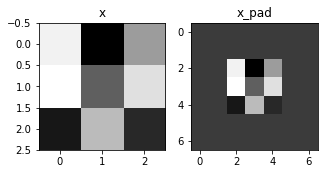

In [4]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print ("x.shape =", x.shape)
print ("x_pad.shape =", x_pad.shape)
print ("x[1,1] =", x[1,1])
print ("x_pad[1,1] =", x_pad[1,1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

**预期输出**:
x.shape = (4, 3, 3, 2)
x_pad.shape = (4, 7, 7, 2)
x[1,1] = [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]

### 3.2 卷积的单个步骤

在这一部分中，实现卷积的单个步骤，其中将滤波器（卷积核）应用于输入的单个位置。这将用于构建卷积单元，该卷积单元：

- 占用输入体积
- 在输入的每个位置都应用滤波器
- 输出另一个体积（通常大小不同）

![Image](../image/L4W1/4.gif)


**图2 **：**卷积操作**
滤波器大小为2x2，步幅为1（步幅=每次滑动时移动窗口的数量）

在计算机视觉应用中，左侧矩阵中的每个值都对应一个像素值，我们将3x3滤波器与图像进行卷积操作，首先将滤波器元素的值与原始矩阵相乘，然后将它们相加。在练习的第一步中，你将实现卷积的单个步骤，相当于仅对一个位置应用滤波器以获得单个实值输出。

在本笔记本的后面，你将应用此函数于输入的多个位置以实现完整的卷积运算。

**练习**：实现conv_single_step()。 [提示](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.sum.html).


In [6]:
# GRADED FUNCTION: conv_single_step

def conv_single_step(a_slice_prev, W, b):
    """
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    
    Arguments:
    a_slice_prev -- slice of input data of shape (f, f, n_C_prev)
    W -- Weight parameters contained in a window - matrix of shape (f, f, n_C_prev)
    b -- Bias parameters contained in a window - matrix of shape (1, 1, 1)
    
    Returns:
    Z -- a scalar value, result of convolving the sliding window (W, b) on a slice x of the input data
    """

    ### START CODE HERE ### (≈ 2 lines of code)
    # Element-wise product between a_slice and W. Add bias.
    s = np.multiply(a_slice_prev, W) + b
    # Sum over all entries of the volume s
    Z = np.sum(s)
    ### END CODE HERE ###

    return Z

In [7]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Z = -23.16021220252078


**预期输出**:
Z = -23.16021220252078


### 3.3 卷积神经网络--正向传递

在正向传递中，你将使用多个滤波器对输入进行卷积。每个“卷积”都会输出一个2D矩阵。然后，你将堆叠这些输出以获得3：

![Image](../image/L4W1/5.gif)

**练习**：实现以下函数，使用滤波器W卷积输入A_prev。此函数将上一层的激活输出（对于一批m个输入）A_prev作为输入，F表示滤波器/权重（W）和偏置向量（b），其中每个滤波器都有自己的（单个）偏置。最后，你还可以访问包含stride和padding的超参数字典。

**提示**：
1.要在矩阵“a_prev”（5,5,3）的左上角选择一个2x2切片，请执行以下操作：
```python
a_slice_prev = a_prev[0:2,0:2,:]
```
使用定义的`start/end`索引定义`a_slice_prev`时将非常有用。
2.要定义a_slice，你需要首先定义其角点 `vert_start`, `vert_end`, `horiz_start` 和 `horiz_end`。该图可能有助于你找到如何在下面的代码中使用h，w，f和s定义每个角。

![Image](../image/L4W1/6.png)

**图3 **：**使用垂直和水平的start/end（2x2滤波器）定义切片**

该图仅显示一个通道。

**提醒**：
卷积的输出维度与输入维度相关公式为：
$$
n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1
$$
$$
n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1
$$
$$
n_C = \text{number of filters used in the convolution}
$$

对于此作业，我们不必考虑向量化，只使用for循环实现所有函数。

In [10]:
# GRADED FUNCTION: conv_forward

def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function
    
    Arguments:
    A_prev -- output activations of the previous layer, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W -- Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b -- Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters -- python dictionary containing "stride" and "pad"
        
    Returns:
    Z -- conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache of values needed for the conv_backward() function
    """
    
    ### START CODE HERE ###
    # Retrieve dimensions from A_prev's shape (≈1 line)  
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Retrieve dimensions from W's shape (≈1 line)
    (f, f, n_C_prev, n_C) = W.shape
    
    # Retrieve information from "hparameters" (≈2 lines)
    stride = hparameters['stride']
    pad = hparameters['pad']
    
    # Compute the dimensions of the CONV output volume using the formula given above. Hint: use int() to floor. (≈2 lines)
    n_H = 1 + int((n_H_prev + 2 * pad - f) / stride)
    n_W = 1 + int((n_W_prev + 2 * pad - f) / stride)
    
    # Initialize the output volume Z with zeros. (≈1 line)
    Z = np.zeros((m, n_H, n_W, n_C))
    
    # Create A_prev_pad by padding A_prev
    A_prev_pad = zero_pad(A_prev, pad)
    
    for i in range(m):                               # loop over the batch of training examples
        a_prev_pad = A_prev_pad[i]                               # Select ith training example's padded activation
        for h in range(n_H):                           # loop over vertical axis of the output volume
            for w in range(n_W):                       # loop over horizontal axis of the output volume
                for c in range(n_C):                   # loop over channels (= #filters) of the output volume
                    
                    # Find the corners of the current "slice" (≈4 lines)
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    
                    # Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell). (≈1 line)
                    a_slice_prev = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]
                  
                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron. (≈1 line)
                    Z[i, h, w, c] = np.sum(np.multiply(a_slice_prev, W[:, :, :, c]) + b[:, :, :, c])
                                        
    ### END CODE HERE ###
    
    # Making sure your output shape is correct
    assert(Z.shape == (m, n_H, n_W, n_C))
    
    # Save information in "cache" for the backprop
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [50]:
np.random.seed(1)
A_prev = np.random.randn(10,4,4,3)
W = np.random.randn(2,2,3,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 2,
               "stride": 1}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)

print("A_prev =", A_prev.shape[1:], "*", A_prev.shape[0])
print("pad =", hparameters['pad'])
print("A_prev_pad =", A_prev.shape[1:] + np.array([hparameters['pad']*2,hparameters['pad']*2,0]), "*", A_prev.shape[0])
print("mask =", W.shape[:3], "*", W.shape[3])
print("stride =", hparameters['stride'])
print("Z =", Z.shape[1:], "*", Z.shape[0])

print("Z's mean =", np.mean(Z))
print("cache_conv[0][1][2][3] =", cache_conv[0][1][2][3])

A_prev = (4, 4, 3) * 10
pad = 2
A_prev_pad = [8 8 3] * 10
mask = (2, 2, 3) * 8
stride = 1
Z = (7, 7, 8) * 10
Z's mean = 0.15585932488906465
cache_conv[0][1][2][3] = [-0.20075807  0.18656139  0.41005165]


**预期输出**:
Z's mean = 0.15585932488906465
cache_conv[0][1][2][3] = [-0.20075807  0.18656139  0.41005165]

最后，CONV层还应包含一个激活，此情况下，我们将添加以下代码行：

```python
# Convolve the window to get back one output neuron
Z[i, h, w, c] = ...
# Apply activation
A[i, h, w, c] = activation(Z[i, h, w, c])
```

在这里你不需要做这个。


## 4 池化层

池化（POOL）层减少了输入的高度和宽度。它有助于减少计算量，而且可以使特征检测器在输入中的位置保持不变。池化层有两种：

- 最大池化：在输入上滑动 ($f, f$)窗口，并将窗口的最大值存储在输出中。

- 平均池化：在输入上滑动 ($f, f$)窗口，并将该窗口的平均值存储在输出中。

![Image](../image/L4W1/7.png)

![Image](../image/L4W1/8.png)

这些池化层没有用于反向传播训练的参数。但是，它们具有超参数，例如窗口大小$f$，它指定了你要计算最大值或平均值的窗口的高度和宽度。

### 4.1 正向池化
现在，你将在同一函数中实现最大池化和平均池化。

**练习**：实现池化层的正向传播。请遵循下述提示。

**提示**：
由于没有填充，因此将池化的输出维度绑定到输入维度的公式为：
$$
n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1
$$
$$
n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1
$$
$$
n_C = n_{C_{prev}}
$$


In [51]:
# GRADED FUNCTION: pool_forward

def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implements the forward pass of the pooling layer
    
    Arguments:
    A_prev -- Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters -- python dictionary containing "f" and "stride"
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    A -- output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache used in the backward pass of the pooling layer, contains the input and hparameters 
    """
    
    # Retrieve dimensions from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Retrieve hyperparameters from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    # Initialize output matrix A
    A = np.zeros((m, n_H, n_W, n_C))              
    
    ### START CODE HERE ###
    for i in range(m):                         # loop over the training examples
        for h in range(n_H):                     # loop on the vertical axis of the output volume
            for w in range(n_W):                 # loop on the horizontal axis of the output volume
                for c in range (n_C):            # loop over the channels of the output volume
                    
                    # Find the corners of the current "slice" (≈4 lines)
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    
                    # Use the corners to define the current slice on the ith training example of A_prev, channel c. (≈1 line)
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]
                    
                    # Compute the pooling operation on the slice. Use an if statment to differentiate the modes. Use np.max/np.mean.
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)
    
    ### END CODE HERE ###
    
    # Store the input and hparameters in "cache" for pool_backward()
    cache = (A_prev, hparameters)
    
    # Making sure your output shape is correct
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [71]:
np.random.seed(1)
A_prev = np.random.randn(2, 4, 4, 3)
hparameters = {"stride" : 1, "f": 4}


print("A_prev =", A_prev.shape[1:], "*", A_prev.shape[0])

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")

print("A =", A.shape[1:],"*",A.shape[0])
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A =", A.shape[1:],"*",A.shape[0]) 

A_prev = (4, 4, 3) * 2
mode = max
A = (1, 1, 3) * 2
mode = average
A = (1, 1, 3) * 2
[[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069   0.3190391 ]
 [-0.24937038  1.46210794 -2.06014071]]


**预期输出:**
mode = max
A = [[[[1.74481176 1.6924546  2.10025514]]]


 [[[1.19891788 1.51981682 2.18557541]]]]

mode = average
A = [[[[-0.09498456  0.11180064 -0.14263511]]]


 [[[-0.09525108  0.28325018  0.33035185]]]]


Nice！现在你已经实现了卷积网络所有层的正向传播。

笔记本的其余部分是可选择学习的，不会用于评分。


## 5 卷积神经网络中的反向传播（可选练习）

在深度学习框架中，你只需要实现正向传播，该框架就可以处理反向传播，因此大多数深度学习工程师不需要理会反向传播的细节。卷积网络的反向传播很复杂。但是，如果你愿意，可以在笔记本的此可选部分中进行操作，以了解卷积网络中反向传播的原理。

在较早的课程中，当你实现了一个简单的（全连接）神经网络时，你就使用了反向传播来计算损失的导数以更新参数。类似地，在卷积神经网络中，你可以计算损失的导数以更新参数。反向传播方程并非不重要，即使我们在课程中并未导出它们，但下面简要介绍了过程。

### 5.1 卷积层的反向传播

让我们从实现CONV层的反向传播开始。

#### 5.1.1 计算 dA：
这是用于针对特定滤波器$W_c$的损失和给定训练示例计算$dA$的公式：

$$
dA += \sum _{h=0} ^{n_H} \sum_{w=0} ^{n_W} W_c \times dZ_{hw} \tag{1}
$$

其中$W_c$ 是一个滤波器，$dZ_{hw}$是一个标量，相对于第h行和第w列的conv层Z的输出的梯度的损失。请注意，每次更新dA时，我们都会将相同的滤波器$W_c$ 乘以不同的dZ。我们这样做主要是因为在计算正向传播时，每个滤波器都由不同的a_slice进行点乘和求和。因此，在为dA计算backprop时，我们只是加上所有a_slices的梯度。

在适当的for循环内，此公式转换为：
```python
da_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :] += W[:,:,:,c] * dZ[i, h, w, c]
```

#### 5.1.2 计算 dW：
这是用于针对损失计算$dW_c$的公式（$dW_c$是一个滤波器的导数）：

$$
dW_c  += \sum _{h=0} ^{n_H} \sum_{w=0} ^ {n_W} a_{slice} \times dZ_{hw}  \tag{2}
$$

其中$a_{slice}$对应于用于生成激活$Z_{ij}$的切片，最终我们得到$W$相对于该切片的梯度。由于它是相同的$W$，因此我们将所有这些梯度加起来即可得到$dW$。

在适当的for循环内，此公式转换为：
```python
dW[:,:,:,c] += a_slice * dZ[i, h, w, c]
```

#### 5.1.3 计算 db：

这是用于某个滤波器$W_c$的损失计算$db$的公式：

$$
db = \ sum_h \ sum_w dZ_ {hw} \ tag {3}
$$

正如你先前在基本神经网络中所见，db是通过将$dZ$相加得出的。在这种情况下，你只需要对转换输出（Z）相对于损失的所有梯度求和。

在适当的for循环内，此公式转换为：
```python
db[:,:,:,c] += dZ[i, h, w, c]
```

**练习**：在下面实现`conv_backward`函数。你应该总结所有训练数据，滤波器，高度和宽度。然后，你应该使用上面的公式1、2和3计算导数。


In [72]:
def conv_backward(dZ, cache):
    """
    Implement the backward propagation for a convolution function
    
    Arguments:
    dZ -- gradient of the cost with respect to the output of the conv layer (Z), numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache of values needed for the conv_backward(), output of conv_forward()
    
    Returns:
    dA_prev -- gradient of the cost with respect to the input of the conv layer (A_prev),
               numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    dW -- gradient of the cost with respect to the weights of the conv layer (W)
          numpy array of shape (f, f, n_C_prev, n_C)
    db -- gradient of the cost with respect to the biases of the conv layer (b)
          numpy array of shape (1, 1, 1, n_C)
    """
    
    ### START CODE HERE ###
    # Retrieve information from "cache"
    (A_prev, W, b, hparameters) = cache
    
    # Retrieve dimensions from A_prev's shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Retrieve dimensions from W's shape
    (f, f, n_C_prev, n_C) = W.shape
    
    # Retrieve information from "hparameters"
    stride = hparameters['stride']
    pad = hparameters['pad']
    
    # Retrieve dimensions from dZ's shape
    (m, n_H, n_W, n_C) = dZ.shape
    
    # Initialize dA_prev, dW, db with the correct shapes
    dA_prev = np.zeros((m, n_H_prev, n_W_prev, n_C_prev))                           
    dW = np.zeros((f, f, n_C_prev, n_C))
    db = np.zeros((1, 1, 1, n_C))

    # Pad A_prev and dA_prev
    A_prev_pad = zero_pad(A_prev, pad)
    dA_prev_pad = zero_pad(dA_prev, pad)
    
    for i in range(m):                       # loop over the training examples
        
        # select ith training example from A_prev_pad and dA_prev_pad
        a_prev_pad = A_prev_pad[i]
        da_prev_pad = dA_prev_pad[i]
        
        for h in range(n_H):                   # loop over vertical axis of the output volume
            for w in range(n_W):               # loop over horizontal axis of the output volume
                for c in range(n_C):           # loop over the channels of the output volume
                    
                    # Find the corners of the current "slice"
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    
                    # Use the corners to define the slice from a_prev_pad
                    a_slice = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]

                    # Update gradients for the window and the filter's parameters using the code formulas given above
                    da_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :] += W[:,:,:,c] * dZ[i, h, w, c]
                    dW[:,:,:,c] += a_slice * dZ[i, h, w, c]
                    db[:,:,:,c] += dZ[i, h, w, c]
                    
        # Set the ith training example's dA_prev to the unpaded da_prev_pad (Hint: use X[pad:-pad, pad:-pad, :])
        dA_prev[i, :, :, :] = dA_prev_pad[i, pad:-pad, pad:-pad, :]
    ### END CODE HERE ###
    
    # Making sure your output shape is correct
    assert(dA_prev.shape == (m, n_H_prev, n_W_prev, n_C_prev))
    
    return dA_prev, dW, db

In [73]:
np.random.seed(1)
dA, dW, db = conv_backward(Z, cache_conv)
print("dA_mean =", np.mean(dA))
print("dW_mean =", np.mean(dW))
print("db_mean =", np.mean(db))

dA_mean = 9.608990675868995
dW_mean = 10.581741275547566
db_mean = 76.37106919563735


**预期输出: **
dA_mean = 9.608990675868995
dW_mean = 10.581741275547563
db_mean = 76.37106919563735

### 5.2 池化层--反向传播

接下来，让我们从MAX-POOL层开始实现池化层的反向传播。即使池化层没有用于反向传播更新的参数，你仍需要通过池化层对梯度进行反向传播，以便计算池化层之前的层的梯度。

#### 5.2.1 最大池化--反向传播

在进入池化层的反向传播之前，首先构建一个名为`create_mask_from_window()`的辅助函数，该函数将执行以下操作：

$$
X = \begin{bmatrix}
1 && 3 \\
4 && 2
\end{bmatrix} \quad \rightarrow  \quad M =\begin{bmatrix}
0 && 0 \\
1 && 0
\end{bmatrix}\tag{4}
$$

此函数创建一个“掩码”矩阵，该矩阵追踪矩阵的最大值。True（1）表示最大值在X中的位置，其他条目为False（0）。稍后你将看到，平均池的反向传播与此相似，但是使用了不同的掩码。

**练习**：实现`create_mask_from_window（）`。此函数将有助于反向池化。
**提示：**
- [np.max（）]（）可能会有所帮助。它计算一个数组的最大值。
- 如果有一个矩阵X和一个标量x：`A =（X == x）`将返回与X大小相同的矩阵A，从而：
```
A[i,j] = True if X[i,j] = x
A[i,j] = False if X[i,j] != x
```
- 此处无需考虑矩阵中有多个最大值的情况。

In [74]:
def create_mask_from_window(x):
    """
    Creates a mask from an input matrix x, to identify the max entry of x.
    
    Arguments:
    x -- Array of shape (f, f)
    
    Returns:
    mask -- Array of the same shape as window, contains a True at the position corresponding to the max entry of x.
    """
    
    ### START CODE HERE ### (≈1 line)
    mask = (x == np.max(x))
    ### END CODE HERE ###
    
    return mask

In [75]:
np.random.seed(1)
x = np.random.randn(2,3)
mask = create_mask_from_window(x)
print('x = ', x)
print("mask = ", mask)

x =  [[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]]
mask =  [[ True False False]
 [False False False]]


**预期输出:** 
x =  [[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]]
mask =  [[ True False False]
 [False False False]]

为什么我们要追踪最大值的位置？因为这是最终影响输出的输入值，也影响了损失。 反向传播算法是根据损失计算梯度的，因此影响最终损失的任何事物都应具有非零的梯度。因此，反向传播将使梯度“传播”回影响损失的特定输入值。

#### 5.2.2 平均池化--反向传播

在最大池化中，对于每个输入窗口，输出上的所有“影响”都来自单个输入值，即最大值。在平均池化中，输入窗口的每个元素对输出的影响均相同 因此，要实现反向传播，你现在将实现一个反映此点的辅助函数。

例如，如果我们使用2x2滤波器在正向传播中进行平均池化，那么用于反向传播的掩码将如下所示：
$$
dZ = 1 \quad \rightarrow  \quad dZ =\begin{bmatrix}
1/4 && 1/4 \\
1/4 && 1/4
\end{bmatrix}\tag{5}
$$

这意味着矩阵$dZ$中的每个位置对输出的贡献均等，因为在正向传播中，我们取平均值。

**练习**：实现以下函数，以通过维度矩阵平均分配值dz。 [提示](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ones.html)


In [76]:
def distribute_value(dz, shape):
    """
    Distributes the input value in the matrix of dimension shape
    
    Arguments:
    dz -- input scalar
    shape -- the shape (n_H, n_W) of the output matrix for which we want to distribute the value of dz
    
    Returns:
    a -- Array of size (n_H, n_W) for which we distributed the value of dz
    """
    
    ### START CODE HERE ###
    # Retrieve dimensions from shape (≈1 line)
    (n_H, n_W) = shape
    
    # Compute the value to distribute on the matrix (≈1 line)
    average = dz / (n_H * n_W)
    
    # Create a matrix where every entry is the "average" value (≈1 line)
    a = np.ones(shape) * average
    ### END CODE HERE ###
    
    return a

In [77]:
a = distribute_value(2, (2,2))
print('distributed value =', a)

distributed value = [[0.5 0.5]
 [0.5 0.5]]


**预期输出**: 
distributed value = [[0.5 0.5]
 [0.5 0.5]]

#### 5.2.3 组合：反向池化

现在，你准备好了在池化层上计算反向传播所需的一切。

**练习**：在两种模式（`"max"`和`"average"`）都实现“pool_backward”功能。再次使用4个for循环（遍历训练数据，高度，宽度和通道）。使用 `if/elif`语句来查看模式是否等于`'max'`或`'average'`。如果等于'average' ，则应使用上面实现的`distribute_value()`函数创建与 `a_slice`维度相同的矩阵。此外，模式等于'`max`'时，你将使用 `create_mask_from_window()`创建一个掩码，并将其乘以相应的dZ值。

In [78]:
def pool_backward(dA, cache, mode = "max"):
    """
    Implements the backward pass of the pooling layer
    
    Arguments:
    dA -- gradient of cost with respect to the output of the pooling layer, same shape as A
    cache -- cache output from the forward pass of the pooling layer, contains the layer's input and hparameters 
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    dA_prev -- gradient of cost with respect to the input of the pooling layer, same shape as A_prev
    """
    
    ### START CODE HERE ###
    
    # Retrieve information from cache (≈1 line)
    (A_prev, hparameters) = cache
    
    # Retrieve hyperparameters from "hparameters" (≈2 lines)
    stride = hparameters['stride']
    f = hparameters['f']
    
    # Retrieve dimensions from A_prev's shape and dA's shape (≈2 lines)
    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
    m, n_H, n_W, n_C = dA.shape
    
    # Initialize dA_prev with zeros (≈1 line)
    dA_prev = np.zeros_like(A_prev)
    
    for i in range(m):                       # loop over the training examples
        
        # select training example from A_prev (≈1 line)
        a_prev = A_prev[i]
        
        for h in range(n_H):                   # loop on the vertical axis
            for w in range(n_W):               # loop on the horizontal axis
                for c in range(n_C):           # loop over the channels (depth)
                    
                    # Find the corners of the current "slice" (≈4 lines)
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    
                    # Compute the backward propagation in both modes.
                    if mode == "max":
                        
                        # Use the corners and "c" to define the current slice from a_prev (≈1 line)
                        a_prev_slice = a_prev[vert_start:vert_end, horiz_start:horiz_end, c]
                        # Create the mask from a_prev_slice (≈1 line)
                        mask = create_mask_from_window(a_prev_slice)
                        # Set dA_prev to be dA_prev + (the mask multiplied by the correct entry of dA) (≈1 line)
                        dA_prev[i, vert_start: vert_end, horiz_start: horiz_end, c] += mask * dA[i, vert_start, horiz_start, c]
                        
                    elif mode == "average":
                        
                        # Get the value a from dA (≈1 line)
                        da = dA[i, vert_start, horiz_start, c]
                        # Define the shape of the filter as fxf (≈1 line)
                        shape = (f, f)
                        # Distribute it to get the correct slice of dA_prev. i.e. Add the distributed value of da. (≈1 line)
                        dA_prev[i, vert_start: vert_end, horiz_start: horiz_end, c] += distribute_value(da, shape)
                        
    ### END CODE ###
    
    # Making sure your output shape is correct
    assert(dA_prev.shape == A_prev.shape)
    
    return dA_prev

In [79]:
np.random.seed(1)
A_prev = np.random.randn(5, 5, 3, 2)
hparameters = {"stride" : 1, "f": 2}
A, cache = pool_forward(A_prev, hparameters)
dA = np.random.randn(5, 4, 2, 2)

dA_prev = pool_backward(dA, cache, mode = "max")
print("mode = max")
print('mean of dA = ', np.mean(dA))
print('dA_prev[1,1] = ', dA_prev[1,1])  
print()
dA_prev = pool_backward(dA, cache, mode = "average")
print("mode = average")
print('mean of dA = ', np.mean(dA))
print('dA_prev[1,1] = ', dA_prev[1,1]) 

mode = max
mean of dA =  0.14571390272918056
dA_prev[1,1] =  [[ 0.          0.        ]
 [ 5.05844394 -1.68282702]
 [ 0.          0.        ]]

mode = average
mean of dA =  0.14571390272918056
dA_prev[1,1] =  [[ 0.08485462  0.2787552 ]
 [ 1.26461098 -0.25749373]
 [ 1.17975636 -0.53624893]]


**预期输出**: 
mode = max
mean of dA =  0.14571390272918056
dA_prev[1,1] =  [[ 0.          0.        ]
 [ 5.05844394 -1.68282702]
 [ 0.          0.        ]]

mode = average
mean of dA =  0.14571390272918056
dA_prev[1,1] =  [[ 0.08485462  0.2787552 ]
 [ 1.26461098 -0.25749373]
 [ 1.17975636 -0.53624893]]

### 恭喜！

祝贺你完成此作业。你现在了解了卷积神经网络如何工作，实现了构建神经网络所需的所有模块。
在下一项作业中，你将使用TensorFlow实现ConvNet。